# Embedding visualisation

In [1]:
import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from vis.visualization import visualize_cam, visualize_saliency, visualize_activation
import cv2

import sys
sys.path
sys.path.append("../../models/classification")

from models import ResNet, AlexNet
from dataset import Dataset

Using TensorFlow backend.


In [2]:
TRAIN_PATH = "../../../honours_project_data/main/train.txt"
VAL_PATH = "../../../honours_project_data/main/test.txt"
WEIGHTS_PATH = "../../../out/new_out/ResNet/ResNet_fusion_weights.h5"

train_data = Dataset(TRAIN_PATH, res=(120, 160))
val_data = Dataset(VAL_PATH, res=(120, 160))
# X, y = train_data.get_all()
X, y = val_data.get_all()

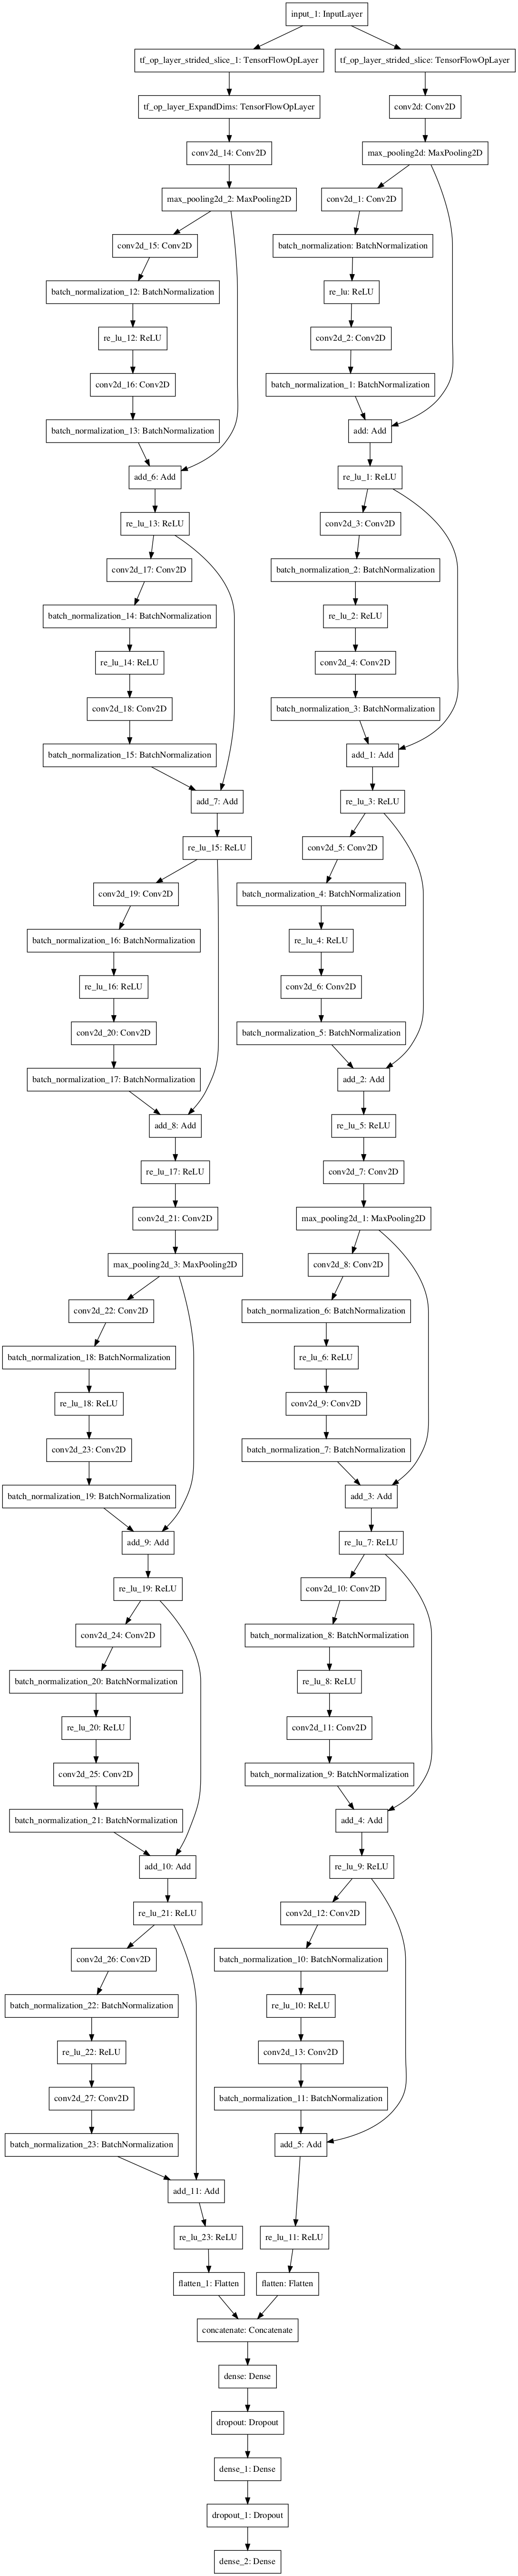

In [3]:
model = ResNet("fusion", train_data.num_classes(), train_data.shape()).get_model()

model.load_weights(WEIGHTS_PATH)
layer_dict = dict([(layer.name, layer) for layer in model.layers])

layers = list(enumerate([layer.name for layer in model.layers]))
layers_dict = {layer[1]: layer[0] for layer in layers}

K.utils.plot_model(model)

In [7]:
def get_layer_output(model, layer, x):
    fn = K.backend.function([model.layers[0].input],
                            [layer_dict[layer].output])
    return fn([x])[0]

def plot_embedding(x, y, legend=False):
    fig, ax = plt.subplots(1, figsize=(6, 6), dpi=200)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    cm = plt.cm.get_cmap("Set1")
    f = plt.figure(figsize=(13, 13))
    for cname, clabel in train_data.classes.items():  
        x_0 = x[:, 0][y == clabel]
        x_1 = x[:, 1][y == clabel]
        y_class = y[y == clabel]
        sc = ax.scatter(x_0, x_1, lw=0, s=30, cmap=cm, label=cname, alpha=0.7)
    ax.axis("off")
    ax.axis("tight")
    if legend:
        ax.legend(prop={"size": 13})
    fig.savefig("output.pdf")
    
def evaluate_layer(model, layer, X_, y_, legend=False):
    X_conv = get_layer_output(model, layer, X_)
    y_embeddings = TSNE(n_components=2, init="pca", random_state=0).fit_transform(X_conv.reshape(X_conv.shape[0], -1))
    plot_embedding(y_embeddings, np.argmax(y_, axis=1), legend=legend)

### Initial images

In [8]:
%%time
y_embeddings = TSNE(n_components=2, init="pca", random_state=0).fit_transform(X.reshape(X.shape[0], -1))

CPU times: user 40.7 s, sys: 733 ms, total: 41.4 s
Wall time: 37.1 s


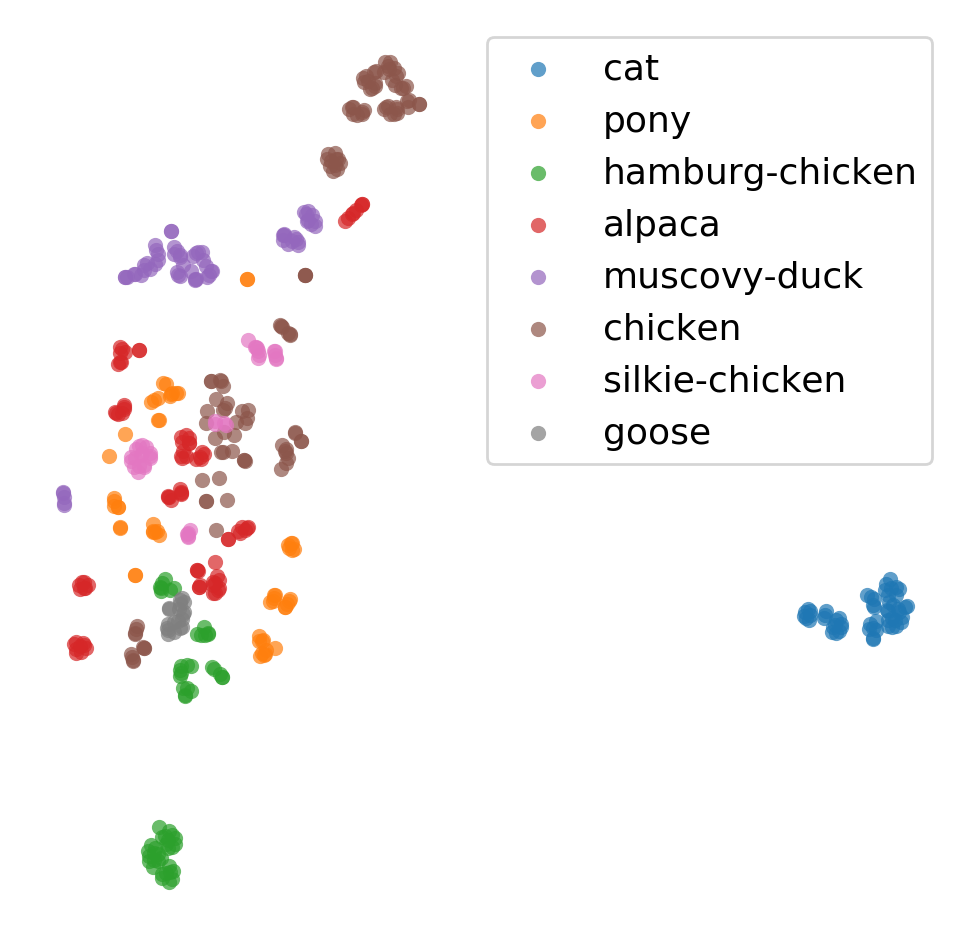

<Figure size 936x936 with 0 Axes>

In [9]:
plot_embedding(y_embeddings, np.argmax(y, axis=1), legend=True)

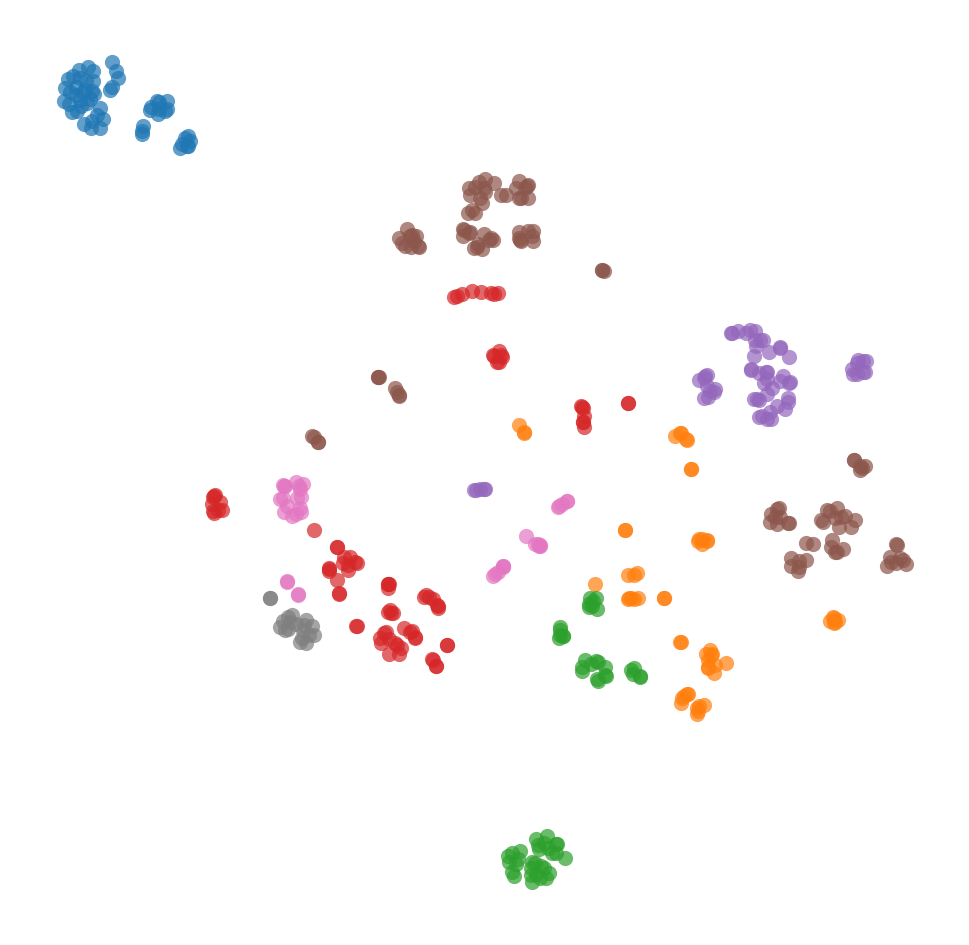

<Figure size 936x936 with 0 Axes>

In [10]:
evaluate_layer(model, "conv2d_13", X, y)

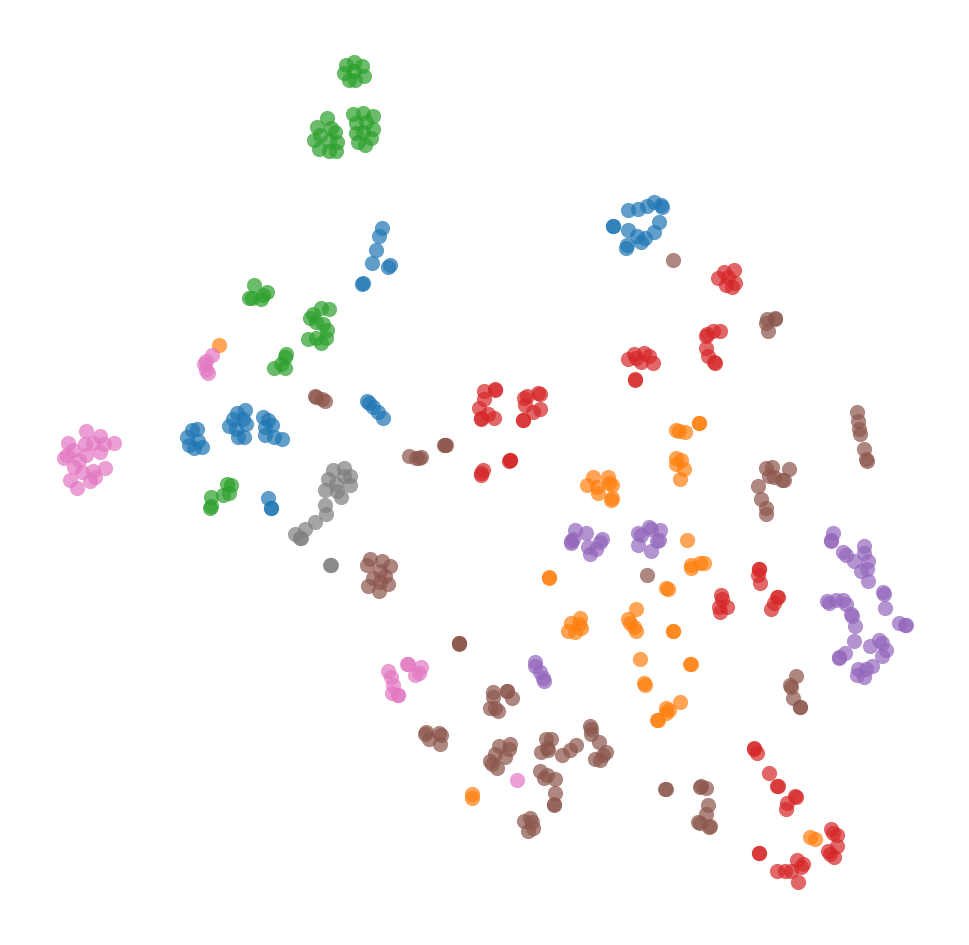

<Figure size 936x936 with 0 Axes>

In [11]:
evaluate_layer(model, "conv2d_27", X, y)

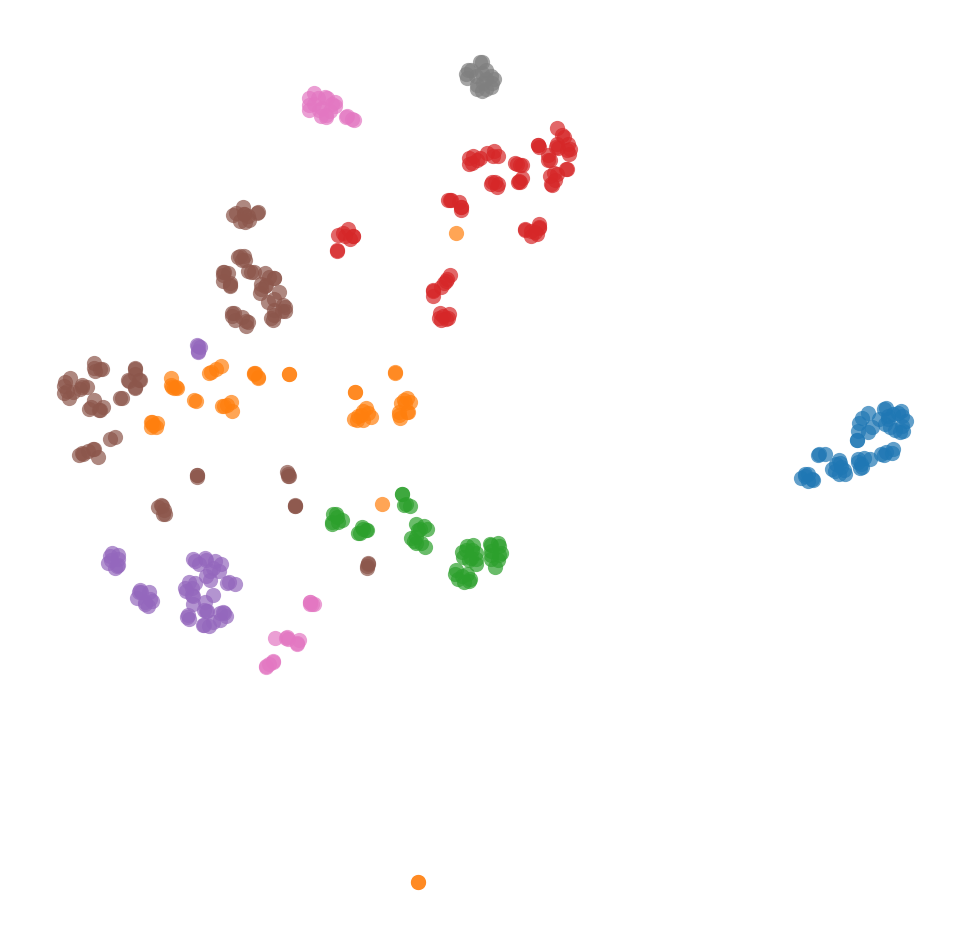

<Figure size 936x936 with 0 Axes>

In [12]:
evaluate_layer(model, "dense_1", X, y)